These simulations are run under steady conditions -- after initial transients die away they are used to extract the steady operating curve of the turbine (e.g. what power is generated at each wind speed).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helpers import read_out

First look at an example simulation:

In [24]:
df = read_out("../runs/steady_wind/ws8.0/5MW_Land_DLL_Steady.out")

In [25]:
df.columns

Index(['Wind1VelX', 'Wind1VelY', 'Wind1VelZ', 'OoPDefl1', 'IPDefl1',
       'TwstDefl1', 'BldPitch1', 'Azimuth', 'RotSpeed', 'GenSpeed', 'TTDspFA',
       'TTDspSS', 'TTDspTwst', 'Spn2MLxb1', 'Spn2MLyb1', 'RootFxb1',
       'RootFyb1', 'RootFzb1', 'RootMxb1', 'RootMyb1', 'RootMzb1', 'RotThrust',
       'RotTorq', 'LSSGagMya', 'LSSGagMza', 'YawBrFxp', 'YawBrFyp', 'YawBrFzp',
       'YawBrMxp', 'YawBrMyp', 'YawBrMzp', 'TwrBsFxt', 'TwrBsFyt', 'TwrBsFzt',
       'TwrBsMxt', 'TwrBsMyt', 'TwrBsMzt', 'GenPwr', 'GenTq', 'BlPitchC1',
       'BlPitchC2', 'BlPitchC3'],
      dtype='object')

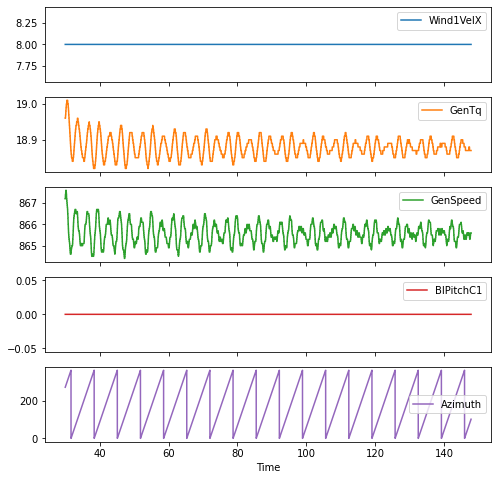

In [26]:
df[["Wind1VelX", "GenTq", "GenSpeed", "BlPitchC1", "Azimuth"]].loc[:].plot(subplots=True, figsize=(8, 8));

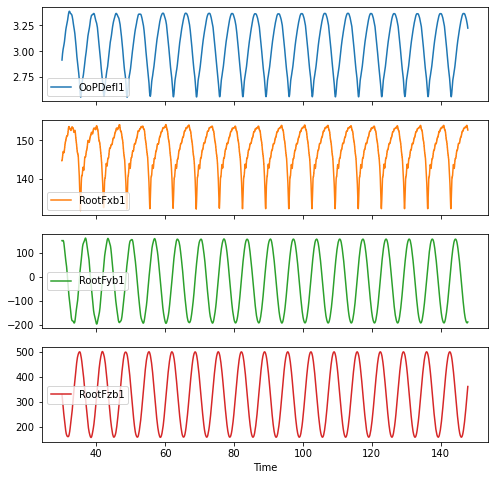

In [27]:
df[["OoPDefl1", "RootFxb1", "RootFyb1", "RootFzb1"]].loc[:].plot(subplots=True, figsize=(8, 8));

Now let's load all the simulations at different wind speeds (keeping only the last N_PTS points):

In [15]:
means = []
stds = []
N_PTS = 10_000
for ws in [4, 6, 8, 10, 11.5, 12.5, 14, 16]:
    df = read_out(f"../runs/steady_wind/ws{ws:0.1f}/5MW_Land_DLL_Steady.out")
    means.append(df.iloc[-N_PTS:].mean())
    stds.append(df.iloc[-N_PTS:].std())
means = pd.DataFrame(means).set_index("Wind1VelX")
stds = pd.DataFrame(stds).set_index("Wind1VelX")
stds.index.values[:] = means.index

In [16]:
def plot_mean_std(means, stds, column):
    means[column].plot();
    plt.fill_between(means.index,
                     means[column] - stds[column]*3,
                     means[column] + stds[column]*3,
                     alpha=0.5)
    plt.title(column)

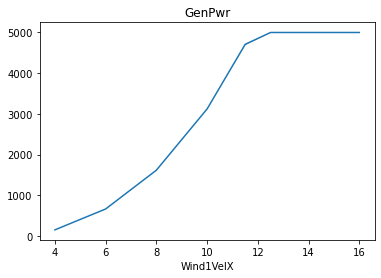

In [17]:
plot_mean_std(means, stds, "GenPwr")

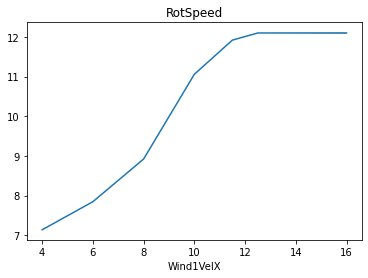

In [18]:
plot_mean_std(means, stds, "RotSpeed")

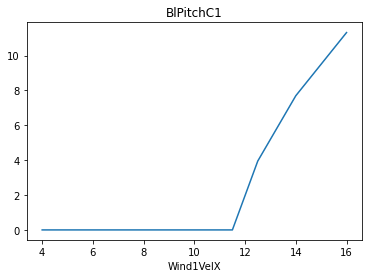

In [19]:
plot_mean_std(means, stds, "BlPitchC1")

Plotting the standard deviation shouldn't be necessary but it's a check that the simulations really have converged to a steady state.